In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [197]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import mutual_info_regression

In [198]:
df = pd.read_csv('/content/insurance.csv')

In [199]:
df['bmi'] = df['bmi'].fillna(df['bmi'].median())
df['age'] = df['age'].fillna(df['age'].median())
df['children'] = df['children'].fillna(df['children'].median())

In [200]:
df['sex'] = df['sex'].fillna(df['sex'].mode()[0])
df['smoker'] = df['smoker'].fillna(df['smoker'].mode()[0])
df['region'] = df['region'].fillna(df['region'].mode()[0])

In [201]:
df_encoded = pd.get_dummies(df, drop_first=True, dtype=int)

In [202]:
X = df_encoded.drop("charges", axis=1)
y = df_encoded["charges"]

In [203]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [204]:
lr_b = LinearRegression().fit(x_train, y_train)
ls_b = Lasso().fit(x_train, y_train)
rg_b = Ridge().fit(x_train, y_train)
rf_b = RandomForestRegressor(n_estimators=300, random_state=42).fit(x_train, y_train)

In [205]:
r2_before = [
    r2_score(y_test, lr_b.predict(x_test)),
    r2_score(y_test, ls_b.predict(x_test)),
    r2_score(y_test, rg_b.predict(x_test)),
    r2_score(y_test, rf_b.predict(x_test))
]

In [185]:
mi_scores = mutual_info_regression(X, y)
mi_series = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

/tmp/ipython-input-186-346218114.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mi_series.values, y=mi_series.index, palette="viridis")


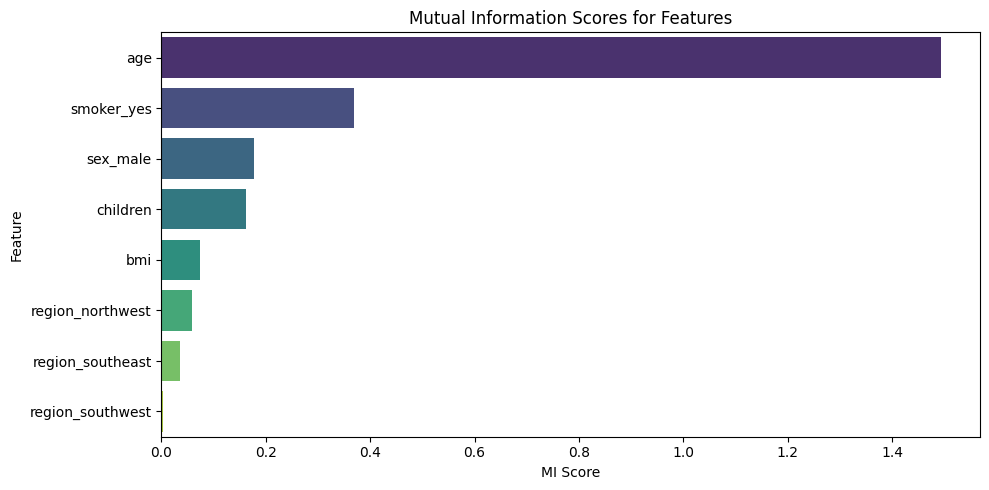

In [186]:
plt.figure(figsize=(10, 5))
sns.barplot(x=mi_series.values, y=mi_series.index, palette="viridis")
plt.title("Mutual Information Scores for Features")
plt.xlabel("MI Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [187]:
selected_features = mi_series[mi_series > 0.06].index.tolist()

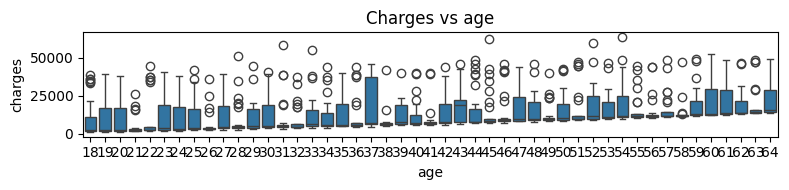

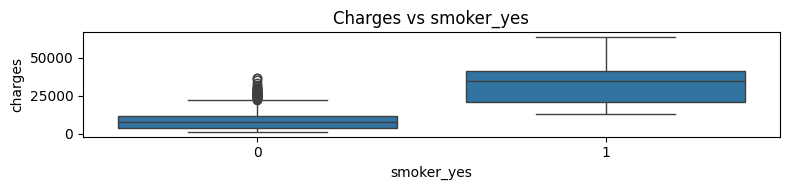

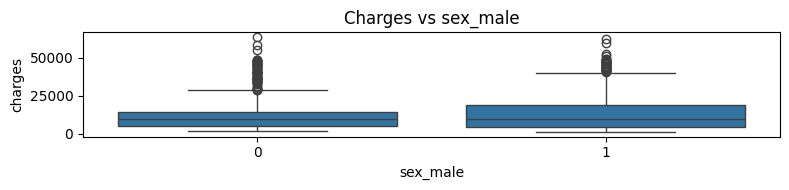

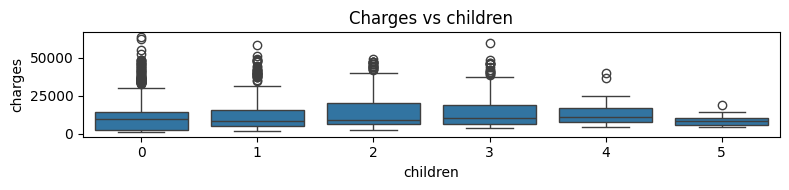

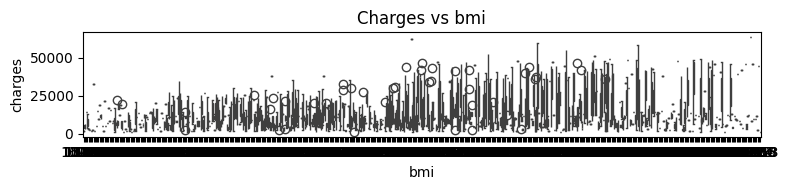

In [188]:
for feature in selected_features:
    plt.figure(figsize=(8, 2))
    sns.boxplot(x=df_encoded[feature], y=y)
    plt.title(f"Charges vs {feature}")
    plt.tight_layout()
    plt.show()

In [189]:
df_clean = df_encoded.copy()

In [190]:
for col in ['age', 'bmi', 'children']:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]

In [191]:
X_final = df_clean[selected_features]
y_final = df_clean["charges"]
x_train, x_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

In [192]:
lr = LinearRegression().fit(x_train, y_train)
ls = Lasso().fit(x_train, y_train)
rg = Ridge().fit(x_train, y_train)
rf = RandomForestRegressor(n_estimators=300, max_depth=15, random_state=42).fit(x_train, y_train)

In [193]:
r2_after = [
    r2_score(y_test, lr.predict(x_test)),
    r2_score(y_test, ls.predict(x_test)),
    r2_score(y_test, rg.predict(x_test)),
    r2_score(y_test, rf.predict(x_test))
]

In [194]:
models = ['Linear', 'Lasso', 'Ridge', 'Random Forest']
x = np.arange(len(models))
width = 0.35

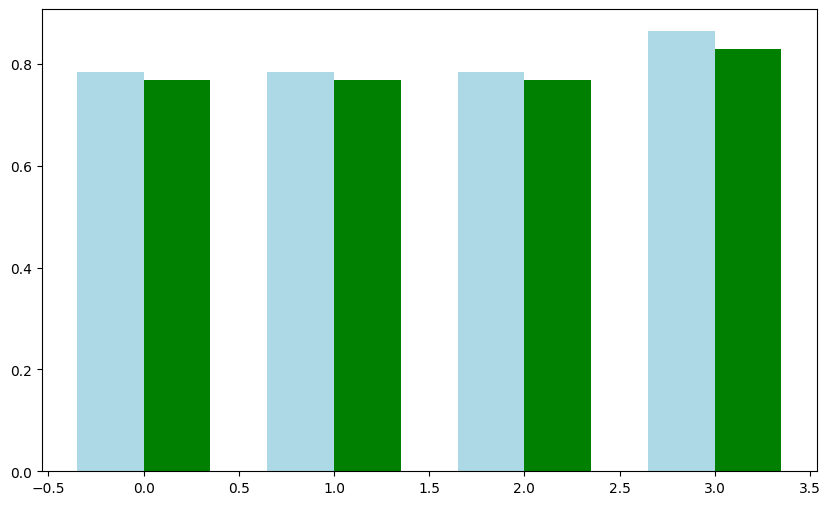

In [195]:
plt.figure(figsize=(10, 6))
bars1 = plt.bar(x - width/2, r2_before, width, label='Before Cleaning', color='lightblue')
bars2 = plt.bar(x + width/2, r2_after, width, label='After Cleaning', color='green')